# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
api_key = os.getenv("QUANDL_API_KEY")
type(api_key)

str

In [4]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
btc_response = requests.get(btc_url).json()
btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18615181,
   'total_supply': 18615181,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 33946.0,
     'volume_24h': 47327715225,
     'market_cap': 632491456603,
     'percentage_change_1h': 0.452863610027213,
     'percentage_change_24h': 2.11891431642344,
     'percentage_change_7d': 5.85753980193673,
     'percent_change_1h': 0.452863610027213,
     'percent_change_24h': 2.11891431642344,
     'percent_change_7d': 5.85753980193673}},
   'last_updated': 1612069377}},
 'metadata': {'timestamp': 1612069377,
  'num_cryptocurrencies': 1371,
  'error': None}}

In [8]:
btc_price = btc_response['data']['1']['quotes']['USD']['price']

In [9]:
# Fetch current ETH price
eth_url = eth_url + api_key
eth_response = requests.get(eth_url).json()
eth_response

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 114473452,
   'total_supply': 114473452,
   'max_supply': 0,
   'quotes': {'USD': {'price': 1354.51,
     'volume_24h': 26419821797,
     'market_cap': 155455273251,
     'percentage_change_1h': 0.261178486922745,
     'percentage_change_24h': 1.75942880999164,
     'percentage_change_7d': 10.017298252141,
     'percent_change_1h': 0.261178486922745,
     'percent_change_24h': 1.75942880999164,
     'percent_change_7d': 10.017298252141}},
   'last_updated': 1612069421}},
 'metadata': {'timestamp': 1612069421,
  'num_cryptocurrencies': 1371,
  'error': None}}

In [10]:
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

In [11]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40735.20
The current value of your 5.3 ETH is $7178.90


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
my_spy = 50
my_agg = 200


In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api")
alpaca_secret_key = os.getenv("aplaca_secret_key")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
start = pd.Timestamp("2020-01-29", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-01-29", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Preview DataFrame
df_portfolio.head(5)

AGG                                       \
                              open      high       low   close   volume   
2020-01-29 00:00:00-05:00  114.130  114.3500  114.1108  114.30  2630910   
2020-01-30 00:00:00-05:00  114.280  114.5400  114.2350  114.32  5275931   
2020-01-31 00:00:00-05:00  114.480  114.6667  114.3800  114.64  4547253   
2020-02-03 00:00:00-05:00  114.215  114.4100  114.0848  114.36  6461793   
2020-02-04 00:00:00-05:00  114.100  114.1000  113.8880  114.00  3260230   

                              SPY                                    
                             open    high     low   close    volume  
2020-01-29 00:00:00-05:00  328.38  328.63  326.40  326.62  41098344  
2020-01-30 00:00:00-05:00  324.36  327.91  323.54  327.66  63015371  
2020-01-31 00:00:00-05:00  327.00  327.17  320.74  321.74  88674257  
2020-02-03 00:00:00-05:00  323.35  326.16  323.22  324.14  55970373  
2020-02-04 00:00:00-05:00  328.07  330.01  327.72  329.08  49979314

In [15]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

df_closing_prices['AGG'] = df_portfolio['AGG']['close']
df_closing_prices['SPY'] = df_portfolio['SPY']['close']
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices.tail()



,AGG,SPY
2021-01-25,117.54,384.40
2021-01-26,117.51,383.83
2021-01-27,117.52,374.44
2021-01-28,117.43,377.60
2021-01-29,117.32,370.19


In [16]:
agg_close_price = float(df_portfolio["AGG"]["close"][-1])
spy_close_price = float(df_portfolio["SPY"]["close"][-1])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.32
Current SPY closing price: $370.19


In [17]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $74038.00
The current value of your 200 AGG shares is $23464.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
amount_data = {
    "amount": [my_btc_value+my_eth_value,my_agg_value+my_spy_value]
}

Pft = ["crypto", "shares"]

df_savings = pd.DataFrame(amount_data, index=Pft)

# Display savings DataFrame
display(df_savings)


,amount
crypto,47914.103
shares,97502.000


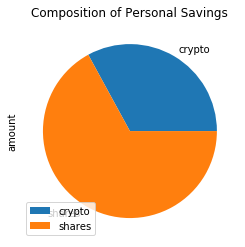

In [19]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())


# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("congratulation! You are achieving your financial goal")
else:
    amount_required = emergency_fund - total_savings
    print(f"You need ${amount_required} to reach your goal")  

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-01-29', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-29', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start,
    end=end
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
2020-01-29 00:00:00-05:00  114.13  114.3500  114.1108  114.30  2628807   
2020-01-30 00:00:00-05:00  114.28  114.5400  114.2350  114.32  5280578   
2020-01-31 00:00:00-05:00  114.48  114.6667  114.3800  114.64  4547253   
2020-02-03 00:00:00-05:00  114.20  114.4100  114.0848  114.36  6583548   
2020-02-04 00:00:00-05:00  114.10  114.1000  113.8880  114.00  3260230   

                              SPY                                    
                             open    high     low   close    volume  
2020-01-29 00:00:00-05:00  328.38  328.63  326.40  326.62  43526297  
2020-01-30 00:00:00-05:00  324.36  327.91  323.54  327.66  67790010  
2020-01-31 00:00:00-05:00  327.00  327.17  320.73  321.74  94752845  
2020-02-03 00:00:00-05:00  323.35  326.16  323.22  324.14  59060165  
2020-02-04 00:00:00-05:00  328.07  330.01  327.72  329.08  52512833

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [24]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2020-01-29 00:00:00-05:00  114.13  114.3500  114.1108  114.30  2628807   
2020-01-30 00:00:00-05:00  114.28  114.5400  114.2350  114.32  5280578   
2020-01-31 00:00:00-05:00  114.48  114.6667  114.3800  114.64  4547253   
2020-02-03 00:00:00-05:00  114.20  114.4100  114.0848  114.36  6583548   
2020-02-04 00:00:00-05:00  114.10  114.1000  113.8880  114.00  3260230   

                                           SPY                          \
                          daily_return    open    high     low   close   
2020-01-29 00:00:00-05:00          NaN  328.38  328.63  326.40  326.62   
2020-01-30 00:00:00-05:00     0.000175  324.36  327.91  323.54  327.66   
2020-01-31 00:00:00-05:00     0.002799  327.00  327.17  320.73  321.74   
2020-02-03 00:00:00-05:00    -0.002442  323.35  326.16  323.22  324.14   
2020-02-04 00:00:00-05:00    -0.003148  328.07  330.01  327.72  329.08   

                                                  
                             volume daily_return  
2020-01-29 00:00:00-05:00  43526297          NaN  
2020-01-30 00:00:00-05:00  67790010     0.003184  
2020-01-31 00:00:00-05:00  94752845    -0.018068  
2020-02-03 00:00:00-05:00  59060165     0.007459  
2020-02-04 00:00:00-05:00  52512833     0.015240

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001363,0.993085,1.008840,1.003953,1.000964,0.998682,1.012571,1.005841,1.017489,1.007911,...,0.995844,1.000960,1.013395,1.008852,1.000095,1.003912,0.979616,0.997110,0.994140,1.012371
2,0.975008,1.001549,1.009811,1.011999,0.997894,1.003116,1.013751,1.009099,1.023898,1.029912,...,0.998449,1.027788,1.024684,1.001173,1.008828,0.993695,0.986466,1.007936,0.998335,1.004538
3,0.988758,1.009883,0.987563,1.023944,0.999350,0.977692,1.019105,1.010019,1.017139,1.029476,...,0.986757,1.044305,1.039441,1.002411,1.015295,1.006546,0.980197,0.996244,1.006882,0.996604
4,0.995553,1.021761,1.014814,1.013118,1.013956,0.989518,1.006303,1.000229,1.003867,1.018309,...,0.985032,1.032821,1.023402,1.010266,1.010054,0.993111,0.970356,1.002019,1.006406,1.000439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.698935,36.959861,6.019315,33.856761,36.069381,14.984128,17.910966,30.451094,14.066239,38.838033,...,25.678463,3.420142,50.122413,7.632004,15.634932,20.457310,11.765194,342.727892,33.209424,15.411516
7557,6.656111,37.511932,5.931723,33.444268,36.801192,14.695452,18.148649,29.809749,14.059481,38.439399,...,25.351762,3.409851,50.344031,7.750227,15.663909,20.073224,11.534016,343.009529,33.982497,15.225389
7558,6.593856,37.418114,5.872935,33.211035,36.263220,14.545634,18.301272,29.698708,14.256428,37.902235,...,25.557576,3.360672,49.914724,7.703030,15.752150,20.024550,11.309782,344.592539,33.580711,15.175359
7559,6.682504,37.311743,5.835662,32.628351,36.550057,14.416342,18.445546,30.529468,14.486492,38.213915,...,25.547834,3.333943,50.180688,7.734175,15.872524,20.077320,11.206149,339.563749,33.977195,15.011956


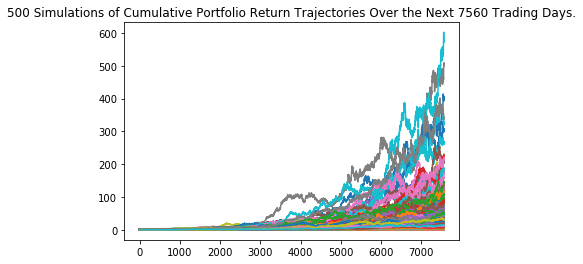

In [26]:
# Plot simulation outcomes
Line_plot = MC_thirtyyear.plot_simulation()

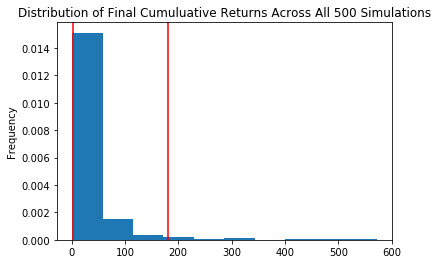

In [27]:
# Plot probability distribution and confidence intervals
Line_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
summary

count           500.000000
mean             35.239011
std              56.159656
min               0.981754
25%              10.028553
50%              18.551339
75%              36.715242
max             571.735929
95% CI Lower      2.404301
95% CI Upper    181.621328
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48086.02 and $3632426.57


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72129.03 and $5448639.85
